# Week 15 Spreadsheets and Additional Resources

## Imports - Run this once

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

## Upload .csv file from your computer (one option)

In [ ]:
# dialog to upload from computer:
uploaded = files.upload()
file_name = next(iter(uploaded))
table_1 = pd.read_csv(io.BytesIO(uploaded[file_name]))

## Get .csv from a URL (another option)

In [2]:
# Data relating to Old Faithful geyser eruptions
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/faithful.csv"

table_1 = pd.read_csv(url)

Those imports and that url variable will be good for maybe 20 minutes, so you don't have to repeat those steps each time. Now determine what columns you want and convert them to numpy arrays.

In [3]:
# You could just display the whole table, but that might be too much.
# table_1

# Get the headers so you can see the column names and two rows.
print(table_1.head(2))

# Column names as a variable
col_names = table_1.columns

# Another way to get column names
print("\n column names:")
for a in range(len(col_names)):
  print(a, " ", col_names[a])

# One more way
print("\n column names:")
for col in col_names:
  print(col)

   Index   "Eruption length (mins)"  Eruption wait (mins)
0      1                        3.6                    79
1      2                        1.8                    54

 column names:
0   Index
1    "Eruption length (mins)"
2   Eruption wait (mins)

 column names:
Index
 "Eruption length (mins)"
Eruption wait (mins)


Graph index and one other column as (x, y) points

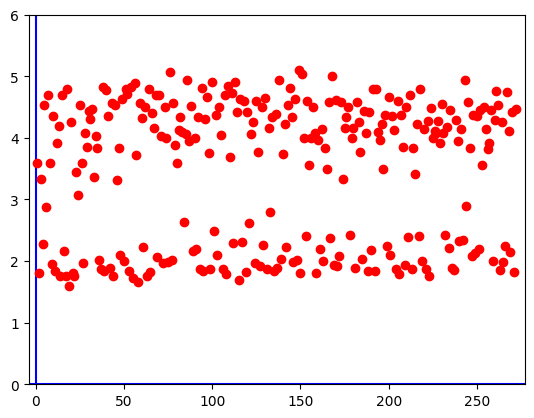

In [7]:
# convert values to numpy arrays
x = table_1['Index'].to_numpy()
y = table_1[' "Eruption length (mins)"'].to_numpy()

# graph
xmin = x.min() - 5
xmax = x.max() + 5
ymin = 0 #y.min() - 5
ymax = 6 #y.max() + 5

fix, ax = plt.subplots()
plt.axis([xmin, xmax, ymin, ymax]) # window size
plt.plot([xmin, xmax], [0, 0], 'b') # blue x axis
plt.plot([0, 0], [ymin, ymax], 'b') # blue y axis
plt.plot(x, y, 'ro') # scatterplot
#plt.plot(x, y, 'b') # line graph
plt.show()

Using variable for column names

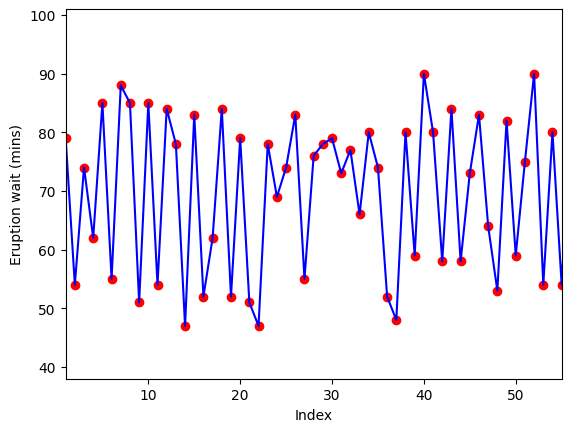

In [13]:
x_name = col_names[0]
y_name = col_names[2]

# convert values to numpy arrays
x = table_1[x_name].to_numpy()
y = table_1[y_name].to_numpy()

# graph
xmin = 1 #x.min() - 5
xmax = 55 #x.max() + 5
ymin = y.min() - 5
ymax = y.max() + 5

fix, ax = plt.subplots()
plt.axis([xmin, xmax, ymin, ymax]) # window size
plt.plot([xmin, xmax], [0, 0], 'b') # blue x axis
plt.plot([0, 0], [ymin, ymax], 'b') # blue y axis
plt.plot(x, y, 'ro') # scatterplot
plt.plot(x, y, 'b') # line graph
ax.set_xlabel(x_name)
ax.set_ylabel(y_name)
plt.show()

Meteostat library for graphing weather data. May only need to install once.

In [14]:
# Just run this code to install library
!pip install meteostat

Columns:

time, tavg, tmin, tmax, prcp, snow, wdir, wspd, wpgt, pres, tsun

Change start and end datetime

Point is (latitude, longitude, meters above the ground)

city mean =  13.038709677419357
suburbs mean =  7.667741935483869


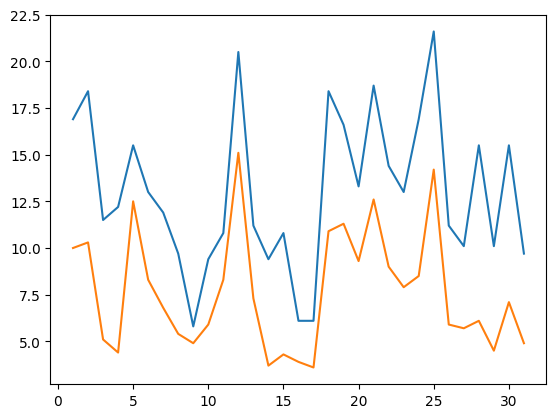

In [21]:
from numpy.core.fromnumeric import mean
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import numpy as np

# Documentation
# https://dev.meteostat.net/python/daily.html#data-structure

# set time period
start = datetime(2022, 7, 1)
end = datetime(2022, 7, 31)

# Create Point for Vancouver, BC or Philadelphia, PA
#vancouver = Point(49.2497, -123.1193, 70)
philly = Point(39.99, -75.15, 10)
burbs = Point(40.1, -75.2)

# Get daily data for 2022
daily_data = Daily(philly, start, end)
my_data = daily_data.fetch()
num_data = my_data['wspd'].to_numpy()
print("city mean = ", mean(num_data))

daily_data2 = Daily(burbs, start, end)
my_data2 = daily_data2.fetch()
num_data2 = my_data2['wspd'].to_numpy()
print("suburbs mean = ", mean(num_data2))

# Plot line chart
x = np.linspace(1, 31, 31)
#my_data.plot(y=['wspd'])
#my_data2.plot(y=['wspd'])
plt.plot(x, my_data['wspd'])
plt.plot(x, my_data2['wspd'])
plt.show()

Monthly loop

month 1 mean = 9.560714285714285


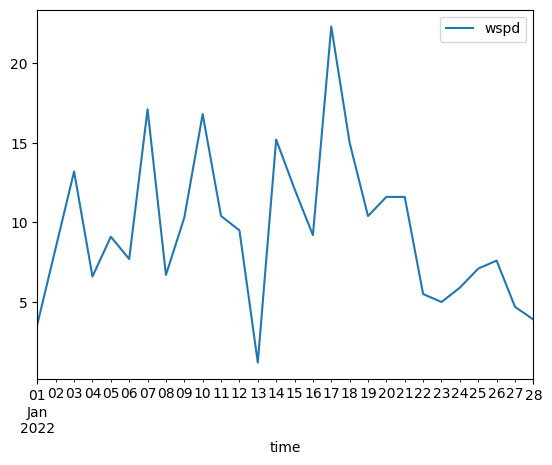

month 2 mean = 9.846428571428572


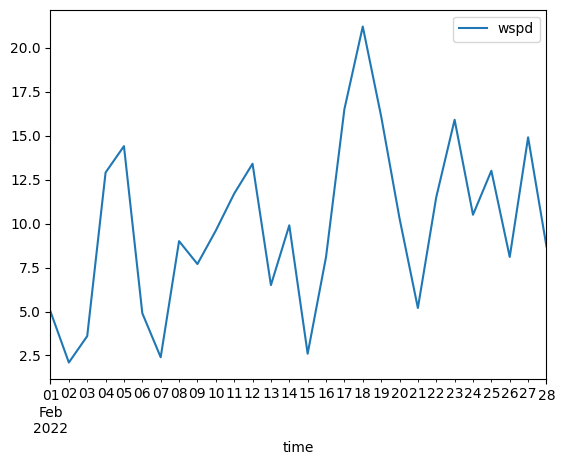

month 3 mean = 11.15


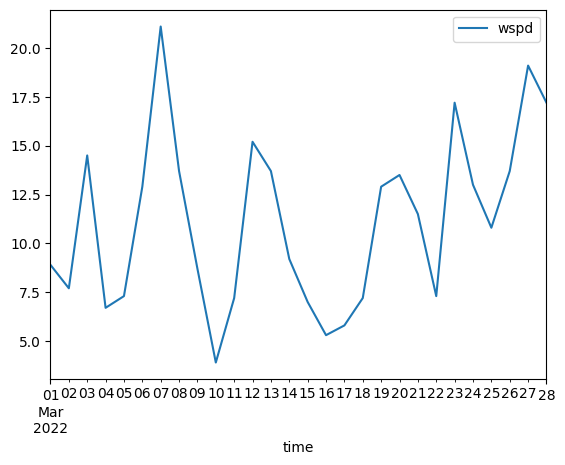

month 4 mean = 12.025


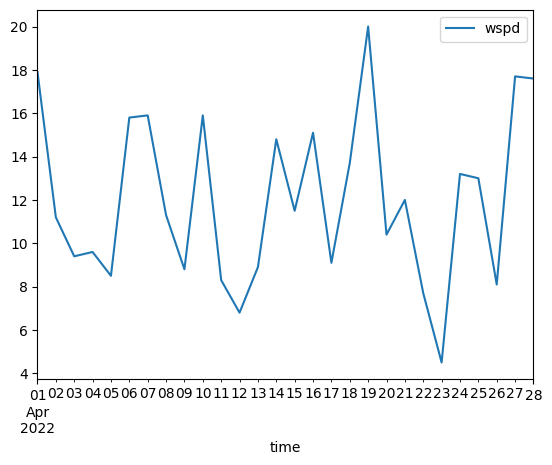

month 5 mean = 9.592857142857142


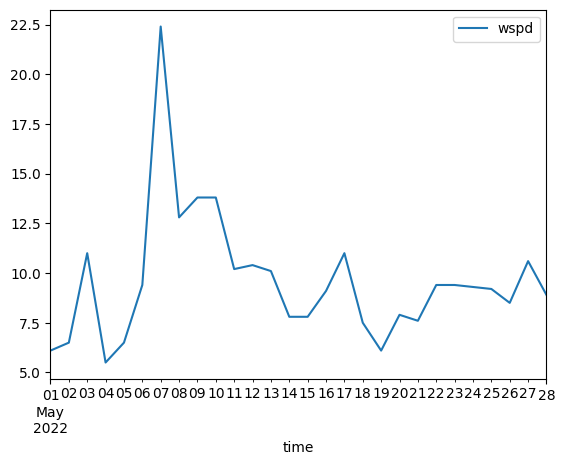

month 6 mean = 7.6571428571428575


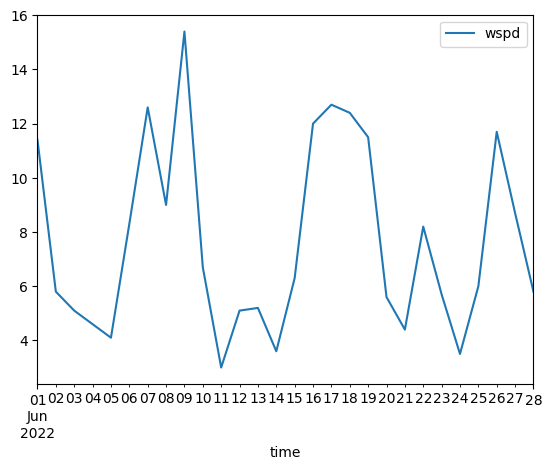

month 7 mean = 7.899999999999999


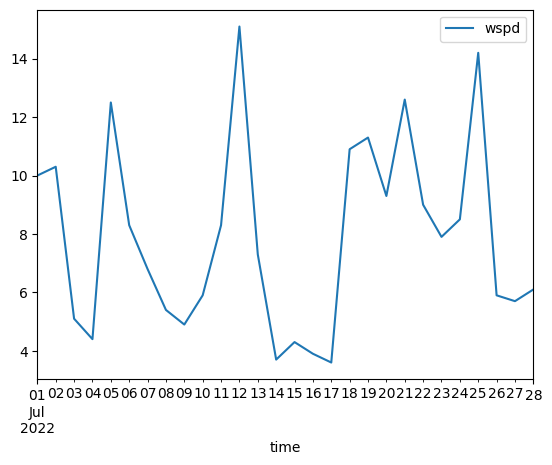

month 8 mean = 7.057142857142858


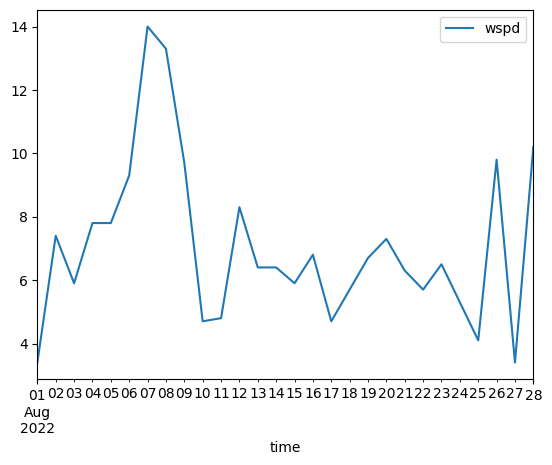

month 9 mean = 6.574999999999998


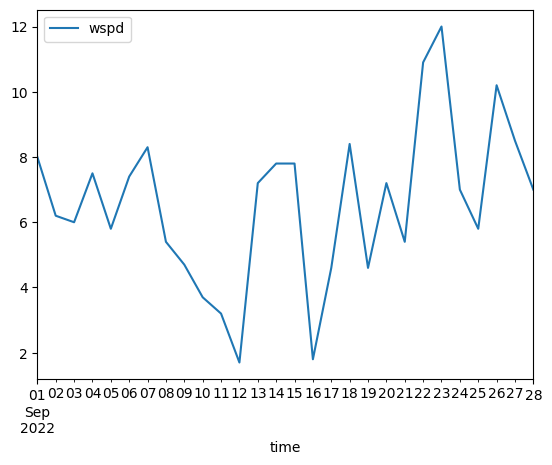

month 10 mean = 6.742857142857142


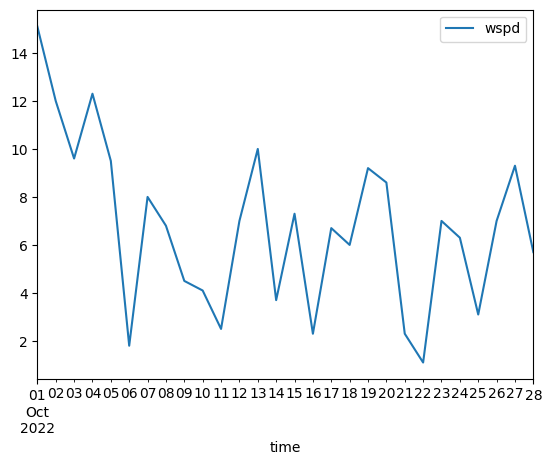

In [22]:
from numpy.core.fromnumeric import mean
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import numpy as np

# Documentation
# https://dev.meteostat.net/python/daily.html#data-structure

for m in range(1, 11):
  # Set time period
  start = datetime(2022, m, 1)
  end = datetime(2022, m, 28)

  # Create Point for Vancouver, BC or Philadelphia, PA
  #vancouver = Point(49.2497, -123.1193, 70)
  #philly = Point(39.99, -75.15, 10)
  burbs = Point(40.1, -75.2)

  daily_data = Daily(burbs, start, end)
  my_data = daily_data.fetch()
  num_data = my_data['wspd'].to_numpy()
  print("month", m, "mean =", mean(num_data))
  # plot line chart including average, minimum, and maximum temperature
  my_data.plot(y=['wspd'])
  plt.show()